# WeatherPy
----

### Analysis
* As shown shown below in the "Latitude vs Max Temp" plot, temperatures are significantly warmer closer to the equator (0 Deg. Latitude). This plot shows an asymmetry, with southern hemisphere locations at generally warmer temperatures than the northern hemisphere. This may be due to the time of year and tilt of the earth.
* There is no strong relationship between latitude and cloudiness. In the sample "City Latitude vs Cloudiness" below, though, there were interesting patterns of bands of cities near 0, 75, and 90% cloudiness.
* There is no strong relationship between latitude and wind speed. However, this sample showed a small spike of increased wind speed @ 60 degrees latitude. Cross-checking these locations with a plot of longitude vs. wind speed at bottom showed a similar increase centered on 0 degrees longitude. From map observations, one might conjecture that increased wind speeds in this area may be influenced by land mass formation and exposure to the ocean and North Sea.

---


In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import math

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
clen = len(cities)
clen

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
infoL=[]
i = 0

print("Beginning Data Retrieval"+os.linesep+"-----------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        # could also use response["cod"] != 404
        mydict={}
        name=response["name"]
        print(f"Processing Record {i % 50} of Set {1+ math.floor(i/50)} | {name}")
        mydict["City"]=name
        mydict["Cloudiness"] = response["clouds"]["all"]
        mydict["Country"] = response["sys"]["country"]
        mydict["Date"] = response["dt"]
        mydict["Humidity"] = response["main"]["humidity"]
        mydict["Lat"] = response["coord"]["lat"]
        mydict["Lng"] = response["coord"]["lon"]
        mydict["Max Temp"] = response["main"]["temp_max"]
        mydict["Wind Speed"] =  response["wind"]["speed"]
        infoL.append(mydict)
        i+=1;
    except KeyError:
        # could also use response["cod"] == 404
        print("City not found. Skipping...")

print("-----------------------------"+os.linesep+"Data Retrieval Complete"+os.linesep+"-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | Challakere
Processing Record 1 of Set 1 | Cape Town
Processing Record 2 of Set 1 | Puerto Ayora
Processing Record 3 of Set 1 | Albany
Processing Record 4 of Set 1 | Tasiilaq
Processing Record 5 of Set 1 | Antalaha
Processing Record 6 of Set 1 | Tessalit
Processing Record 7 of Set 1 | Yulara
Processing Record 8 of Set 1 | Aswan
Processing Record 9 of Set 1 | Chicama
Processing Record 10 of Set 1 | Namatanai
Processing Record 11 of Set 1 | Marrakesh
Processing Record 12 of Set 1 | Busselton
Processing Record 13 of Set 1 | Kavieng
Processing Record 14 of Set 1 | Zhangjiakou
Processing Record 15 of Set 1 | Novo Oriente
Processing Record 16 of Set 1 | Ushuaia
Processing Record 17 of Set 1 | Port Elizabeth
Processing Record 18 of Set 1 | Dikson
Processing Record 19 of Set 1 | Arraial do Cabo
Processing Record 20 of Set 1 | Port Alfred
Processing Record 21 of Set 1 | Ocala
Processing Record 22 of Set 1 | Pen

Processing Record 33 of Set 4 | Mogadishu
Processing Record 34 of Set 4 | Ryabovo
Processing Record 35 of Set 4 | Kashan
City not found. Skipping...
Processing Record 36 of Set 4 | Lompoc
City not found. Skipping...
Processing Record 37 of Set 4 | Sur
Processing Record 38 of Set 4 | Verkhnevilyuysk
Processing Record 39 of Set 4 | Sao Filipe
Processing Record 40 of Set 4 | Berdigestyakh
Processing Record 41 of Set 4 | Tual
Processing Record 42 of Set 4 | Thompson
Processing Record 43 of Set 4 | Hami
Processing Record 44 of Set 4 | Bethel
Processing Record 45 of Set 4 | Avarua
Processing Record 46 of Set 4 | Bayir
Processing Record 47 of Set 4 | Ambilobe
Processing Record 48 of Set 4 | Georgetown
Processing Record 49 of Set 4 | Neuquen
Processing Record 0 of Set 5 | Arroyo
Processing Record 1 of Set 5 | Chuy
Processing Record 2 of Set 5 | Bonavista
City not found. Skipping...
Processing Record 3 of Set 5 | Kavaratti
Processing Record 4 of Set 5 | Cherskiy
Processing Record 5 of Set 5 | A

Processing Record 24 of Set 8 | Ahipara
City not found. Skipping...
Processing Record 25 of Set 8 | Khudumelapye
Processing Record 26 of Set 8 | Yumen
Processing Record 27 of Set 8 | Sosnogorsk
Processing Record 28 of Set 8 | Grand-Santi
Processing Record 29 of Set 8 | Alta Floresta
Processing Record 30 of Set 8 | Vysokogornyy
Processing Record 31 of Set 8 | Yellowknife
Processing Record 32 of Set 8 | Sabang
Processing Record 33 of Set 8 | Gravdal
Processing Record 34 of Set 8 | Provideniya
Processing Record 35 of Set 8 | Kendari
Processing Record 36 of Set 8 | Vao
Processing Record 37 of Set 8 | Sorong
Processing Record 38 of Set 8 | Ontario
Processing Record 39 of Set 8 | Kalmunai
Processing Record 40 of Set 8 | Kerman
Processing Record 41 of Set 8 | Chumikan
Processing Record 42 of Set 8 | General Pico
Processing Record 43 of Set 8 | Belaya Gora
Processing Record 44 of Set 8 | Turbat
Processing Record 45 of Set 8 | Bolobo
City not found. Skipping...
Processing Record 46 of Set 8 | M

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
citydf=pd.DataFrame(infoL)
citydf.to_csv(output_data_file, index=False)
citydf.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [26]:
citydf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Challakere,0,IN,1553305198,37,14.31,76.65,81.68,5.41
1,Cape Town,0,ZA,1553304768,77,-33.93,18.42,70.00,11.41
2,Puerto Ayora,0,EC,1553304641,78,-0.74,-90.35,82.40,6.93
3,Albany,90,US,1553304901,74,42.65,-73.75,37.99,21.92
4,Tasiilaq,68,GL,1553302200,55,65.61,-37.64,8.60,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

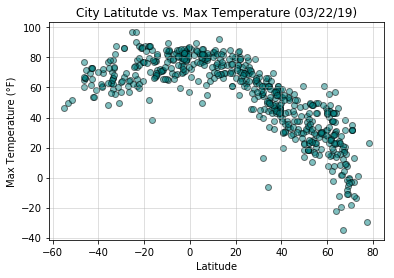

In [37]:
plt.scatter(citydf["Lat"], citydf["Max Temp"], marker="o", facecolors="teal", edgecolors="black", alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (\u00b0F)")
dt = int(citydf.loc[0]["Date"])
wdate = time.strftime("%D", time.localtime(dt))
plt.title(f"City Latitutde vs. Max Temperature ({wdate})")
plt.grid(alpha=.5)
plt.show()

#### Latitude vs. Humidity Plot

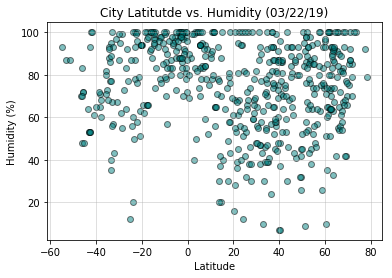

In [39]:
plt.scatter(citydf["Lat"], citydf["Humidity"], marker="o", facecolors="teal", edgecolors="black", alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitutde vs. Humidity ({wdate})")
plt.grid(alpha=.5)
plt.show()

#### Latitude vs. Cloudiness Plot

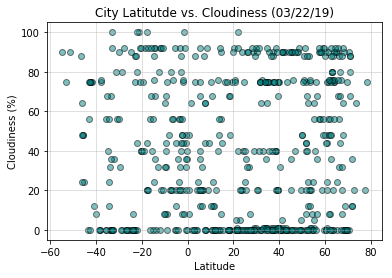

In [40]:
plt.scatter(citydf["Lat"], citydf["Cloudiness"], marker="o", facecolors="teal", edgecolors="black", alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitutde vs. Cloudiness ({wdate})")
plt.grid(alpha=.5)
plt.show()

#### Latitude vs. Wind Speed Plot

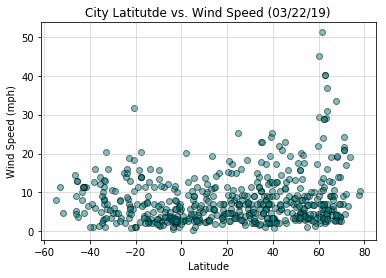

In [41]:
plt.scatter(citydf["Lat"], citydf["Wind Speed"], marker="o", facecolors="teal", edgecolors="black", alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitutde vs. Wind Speed ({wdate})")
plt.grid(alpha=.5)
plt.show()

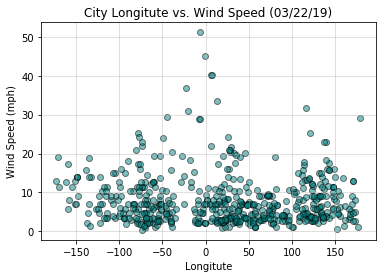

In [43]:
plt.scatter(citydf["Lng"], citydf["Wind Speed"], marker="o", facecolors="teal", edgecolors="black", alpha=.5)
plt.xlabel("Longitute")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Longitute vs. Wind Speed ({wdate})")
plt.grid(alpha=.5)
plt.show()